# Case3 : Two dimensional centered normal-like density example

In this notebook, we estimate normal-like density on two-dimensional tree space by log-concave MLE. 

In [1]:
# importing packages
import lcdtreespace as lcd
import pandas as pd
import numpy as np
from importlib.resources import files
import os
import matplotlib.pyplot as plt

## sample data

We estimate following normal-like density on two-dimensional tree space:
$$f(x) \propto \exp(-d(x,0)^2/2)$$

The density is plotted below on each orthant

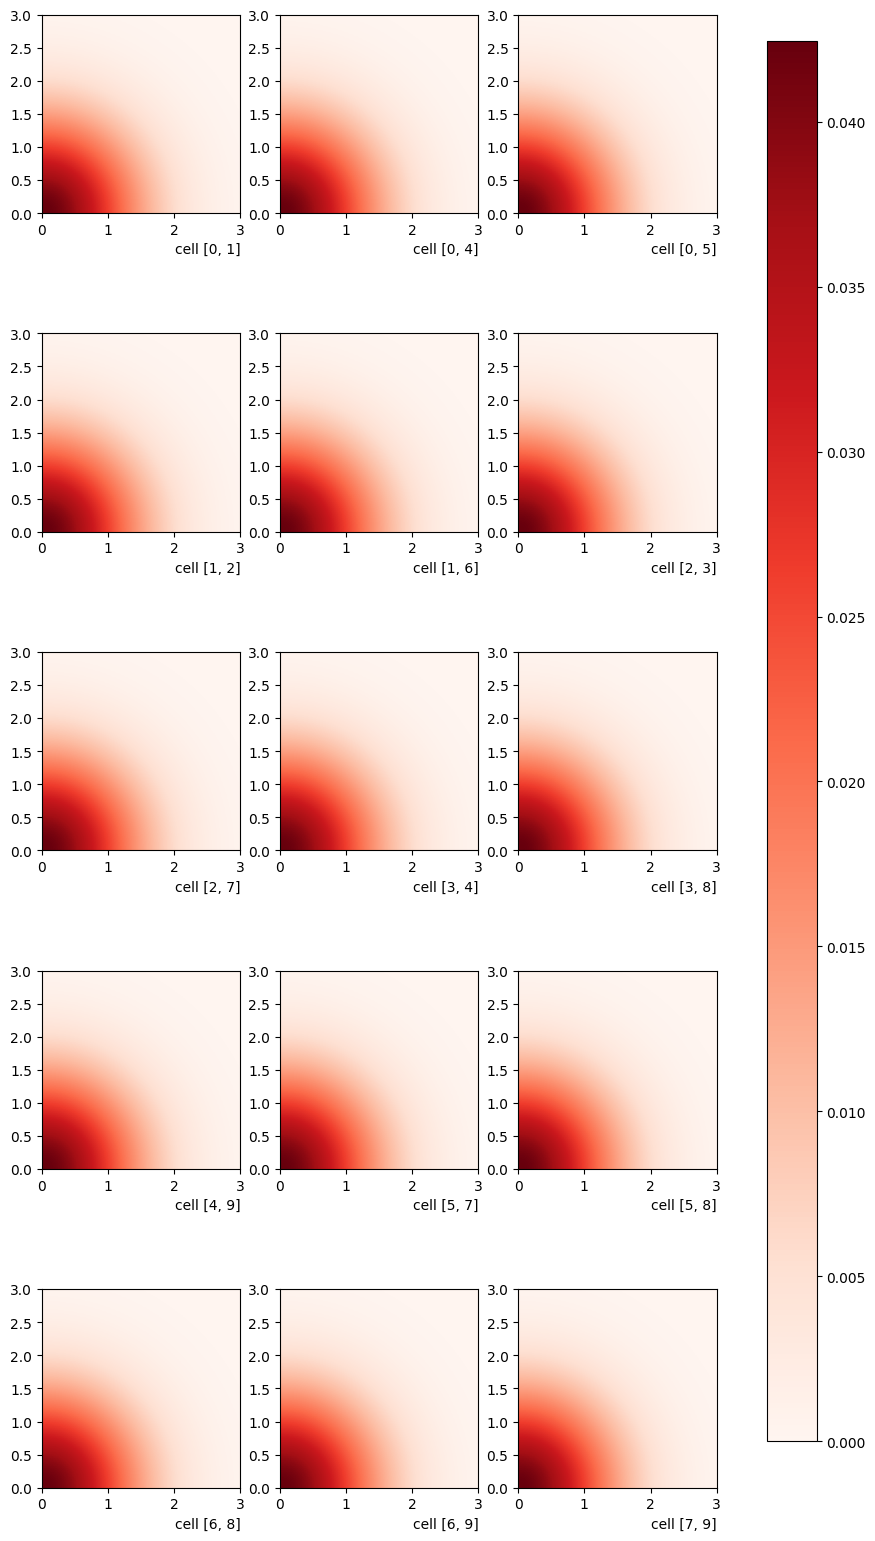

In [2]:
cells = lcd.list_2dcells() # supported on all orthants
true_density = lcd.normal_centered_2dim(cells, sigma=1) # true density
lcd.plot_density_2dim(true_density, xmax=3, ymax=3)
print("")

Package lcdtreespace has sample data drawn from this density at ```files("lcdtreespace").joinpath("data", "case3)```. 

The file "testcase_{$n$}\_{$i$}.csv" contain sample points.

Here, we compute the log-concave MLE from "testcase_100_0.csv" file.

In [3]:
# list of sample data available
np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case3")))[:10]
# see full list with 
# np.sort(os.listdir(files("lcdtreespace").joinpath("data", "case3")))

array(['testcase_1000_0.csv', 'testcase_1000_1.csv',
       'testcase_1000_2.csv', 'testcase_1000_3.csv',
       'testcase_1000_4.csv', 'testcase_1000_5.csv',
       'testcase_1000_6.csv', 'testcase_1000_7.csv',
       'testcase_1000_8.csv', 'testcase_1000_9.csv'], dtype='<U19')

In [4]:
# load data
X = pd.read_csv(files("lcdtreespace").joinpath("data", "case3", "testcase_100_0.csv"))
X.head()
#edge1, edge2 represents the orthant, "x1" and "x2" are the correspoinding coordinates. "
#"angle" is given by tan(x2/x1), while "y" has initial log-likelihood (parameter to be estimated. The initiali value is not normalized to be a density nor log-concave function)

,edge1,edge2,x1,x2,angle,y
0,0,1,1.437666,0.077936,0.054157,-5.231456
1,0,1,0.215841,0.931000,1.342983,-4.786410
2,0,1,0.846701,1.114643,0.921170,-3.260991
3,0,1,0.772248,0.784994,0.793583,-3.982456
4,0,1,0.447238,1.640442,1.304632,-6.190604


## Computation of log-concave MLE

The computation of one dimensional log-concave MLE can be done by ```lcd.lcmle_2dim``` function. 

In [ ]:
opt_y = lcd.lcmle_2dim(X=X,print_objective=True)
# integral should converge to 1

In [7]:
# density object
lcmle = lcd.logconcave_density_estimate_2dim(opt_y, X) # log-concave MLE

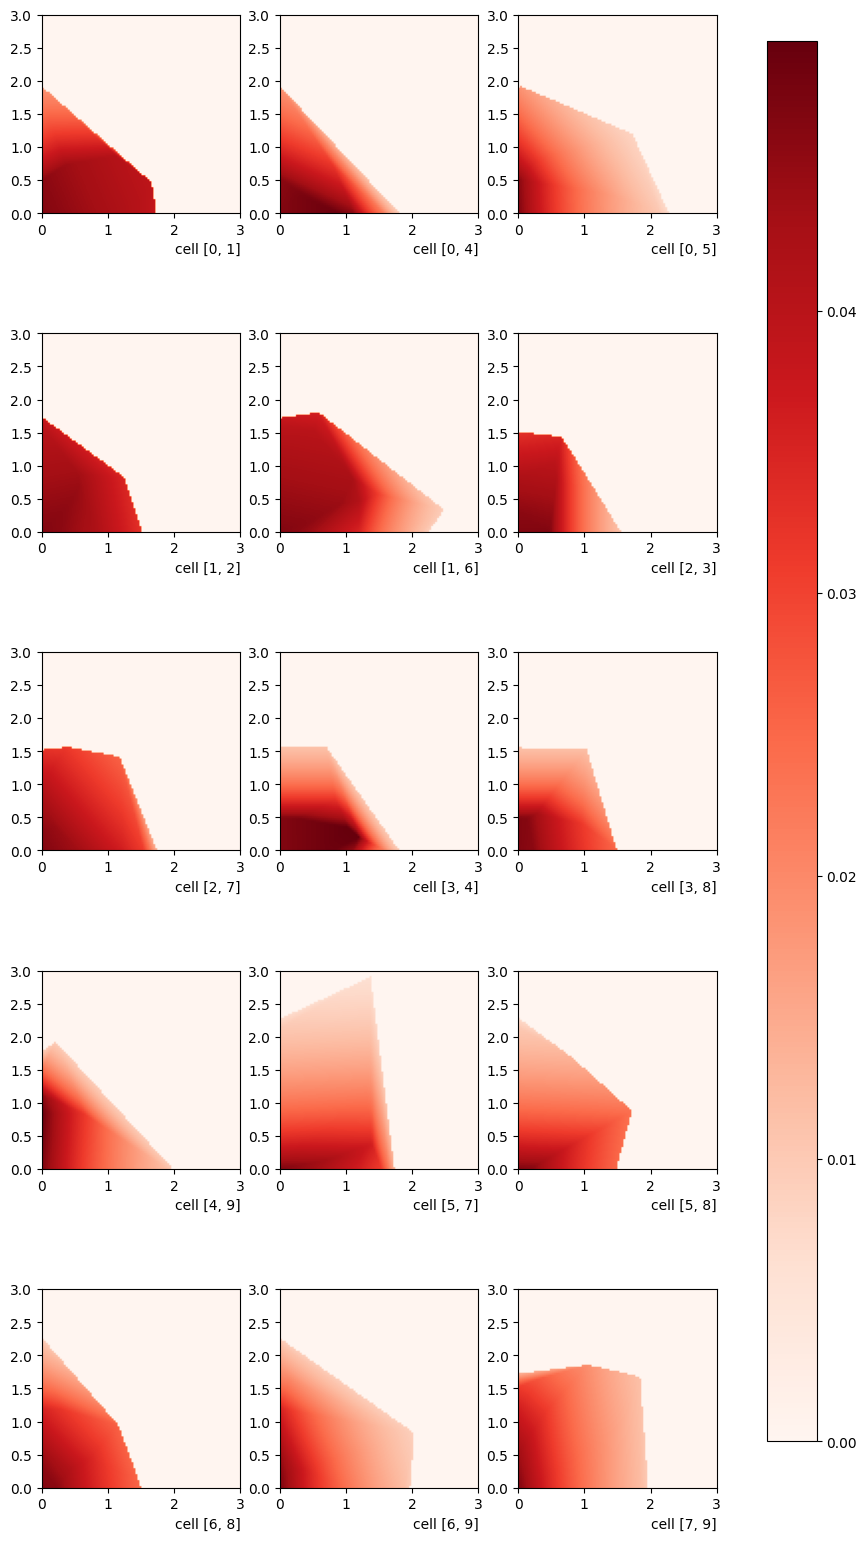

In [8]:
# plot of estimated density
lcd.plot_density_2dim(lcmle, xmax=3, ymax=3)
print("")

## Kernel density estimator
To compare the result, we also compute the kernel density estimator from the same sample.

In [9]:
kde = lcd.kernel_density_estimate_2dim(X)

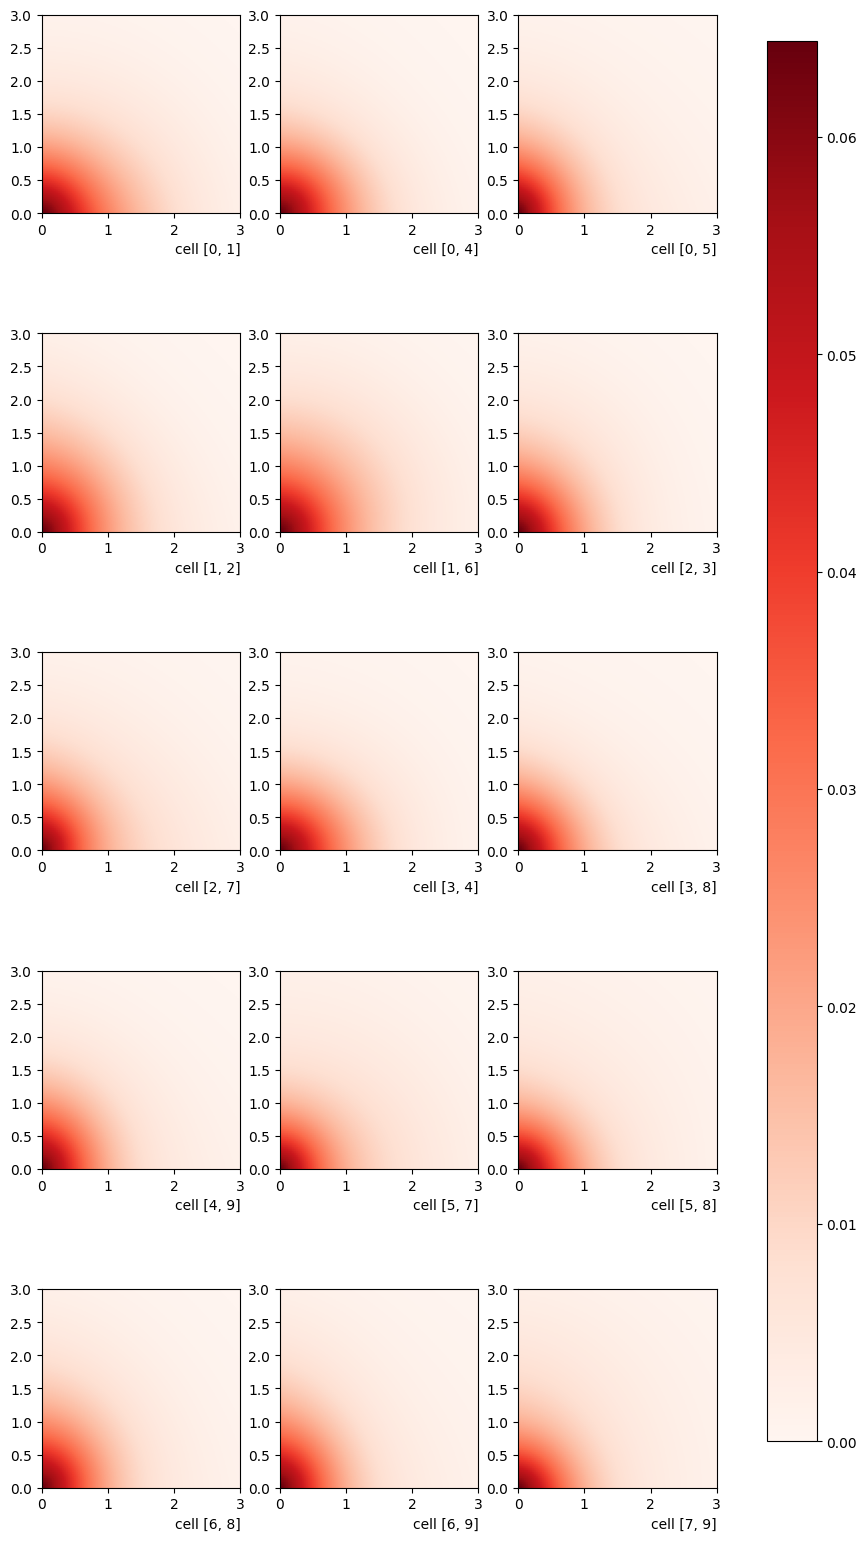

In [10]:
# plot of kernel density estimate
lcd.plot_density_2dim(kde, xmax=3, ymax=3)
print("")

## Computation of Integrated Squared Error (ISE)

In [11]:
# calculation of integrted squared error
lcmle_ise, lcmle_err = lcd.ise_2dim(true_density, lcmle, epsabs = 1e-3)
kde_ise, kde_err = lcd.ise_2dim(true_density, kde, epsabs = 1e-3)

In [12]:
lcmle_ise, kde_ise

(0.004807334987736878, 0.0012371714693134809)